In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras import initializers
from keras.layers import SpatialDropout2D,Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate,AveragePooling2D, UpSampling2D, BatchNormalization, Activation, add,Dropout,Permute,ZeroPadding2D,Add, Reshape
from keras.models import Model, model_from_json
from keras.optimizers import Adam
# from keras.layers.advanced_activations import ELU, LeakyReLU, ReLU, PReLU
# from keras.utils.vis_utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import applications, optimizers, callbacks
import matplotlib
import keras
import tensorflow as tf
from keras.layers import *
import json
from tensorflow.keras.metrics import MeanIoU, Recall, Precision, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
learning_rate = 0.001
from keras.utils import normalize
from keras import backend as K

In [3]:
# Pre-Processing the training data
n_classes = 3
# X_train = np.load('/content/drive/MyDrive/Dataset/liver_dataset_improoved/train2/X_train128.npy')
# Y_train = np.load('/content/drive/MyDrive/Dataset/liver_dataset_improoved/train2/Y_train128.npy')

X_test = np.load('/content/drive/MyDrive/Dataset/liver_dataset_improoved/X_test128.npy')
Y_test = np.load('/content/drive/MyDrive/Dataset/liver_dataset_improoved/Y_test128.npy')

# X_train = np.expand_dims(X_train, axis = 3)
#Normalizing X_train values only
# X_train = normalize(X_train, axis = 1)

X_test = np.expand_dims(X_test, axis = 3)
X_test = normalize(X_test, axis = 1)


# Y_train = np.expand_dims(Y_train, axis = 3)
Y_test = np.expand_dims(Y_test, axis = 3)

# print("Training Data")
# print(X_train.shape)
# print(np.unique(X_train))

# print(Y_train.shape)
# print(np.unique(Y_train))

# Connverting the Y_train into categorical
# Y_train_cat = to_categorical(Y_train, num_classes=n_classes)
# Y_train_cat = Y_train_cat.reshape((Y_train.shape[0], Y_train.shape[1], Y_train.shape[2], n_classes))
# print(Y_train_cat.shape)

Y_test_cat = to_categorical(Y_test, num_classes=n_classes)
Y_test_cat = Y_test_cat.reshape((Y_test.shape[0], Y_test.shape[1], Y_test.shape[2], n_classes))
print(Y_test_cat.shape)

(1916, 128, 128, 3)


In [4]:
# Load Model
cat = tf.keras.models.load_model('/content/drive/MyDrive/Project7thSem/Liver/NewArch/Categorical/unet_liver_model128.h5',compile = False)

In [5]:
path_to_save = '/content/drive/MyDrive/Project7thSem/Liver/NewArch/Categorical/Image'

1/1 [==============================] - 3s 3s/step
770


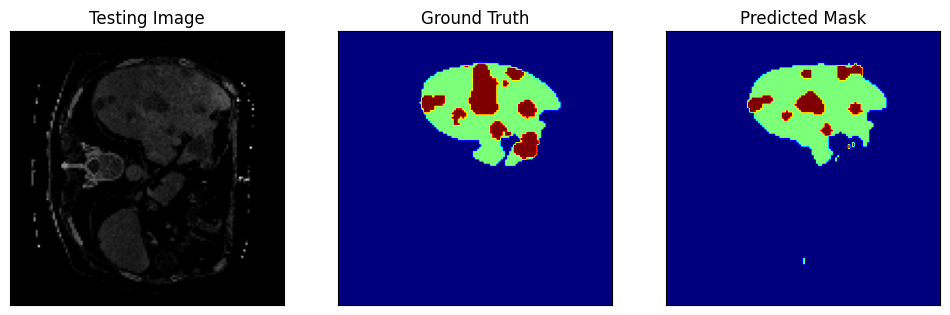

In [7]:
import random
test_img_number = 770
# test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=Y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (cat.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
print(test_img_number)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(232)
plt.title('Ground Truth')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(233)
plt.title('Predicted Mask')
plt.imshow(predicted_img, cmap='jet')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.savefig(path_to_save+'/newArch_liver_mask_plot.png')
plt.show()